## 3.1 Эксперимент: Траектория градиентного спуска на квадратичной функции

Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: при-
думайте две-три квадратичныедвумерныефункции, на которых работа метода будет отличаться, на-
рисуйте графики с линиями уровня функций и траекториями методов.  

Попробуйте ответить на следующий вопрос:Как отличается поведение метода в зависимости от
числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная
стратегия, Армихо, Вульф)?  

Для рисования линий уровня можете воспользоваться функцией `plot_levels`, а для рисования
траекторий `plot_trajectory` из файла `plot_trajectory_2d.py`, прилагающегося к заданию.  
Также обратите внимание, что оракул квадратичной функции `QuadraticOracle` уже реализован в
модуле `oracles`. Он реализует функцию $f(x) = (1/2)〈Ax, x〉−〈b, x〉$, где $A∈S^n_{++}, b ∈ R^n$.




Хорошо обусловленная (число обусловленности 1.0)


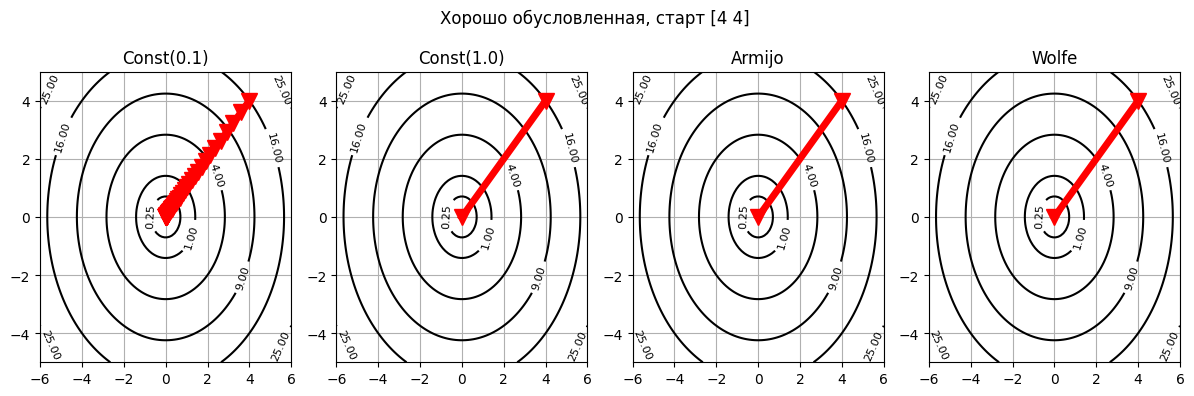

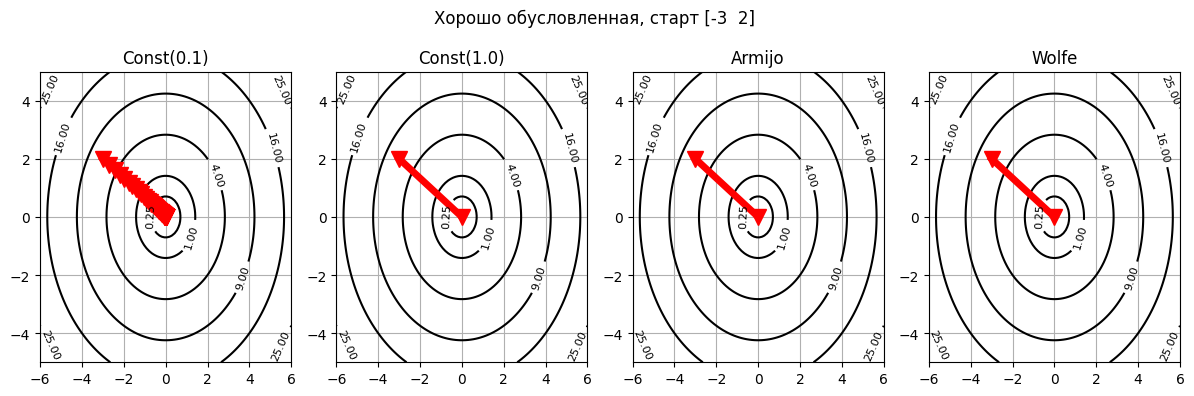

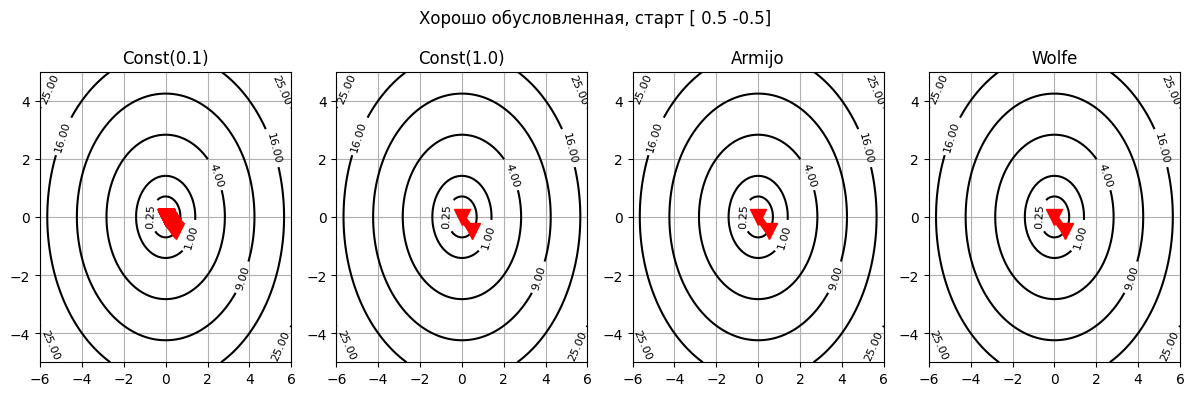


Плохо обусловленная (число обусловленности 100.0)


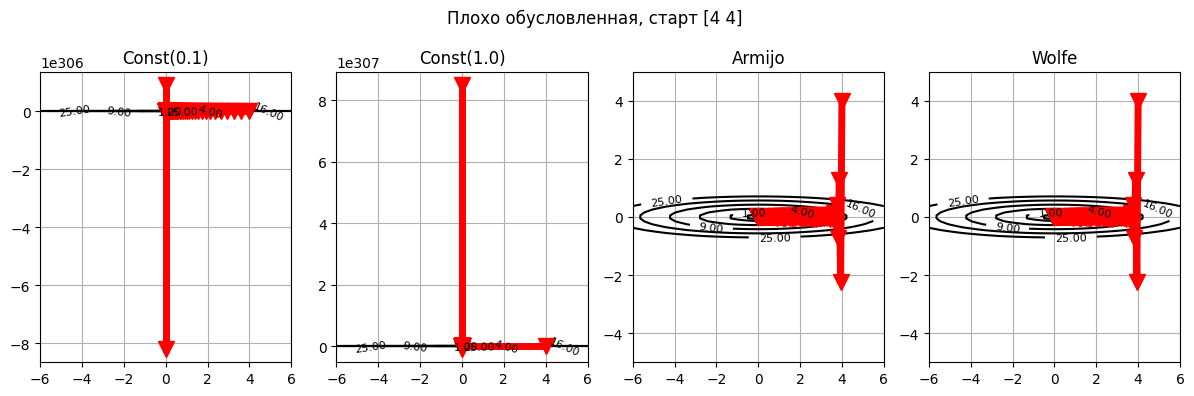

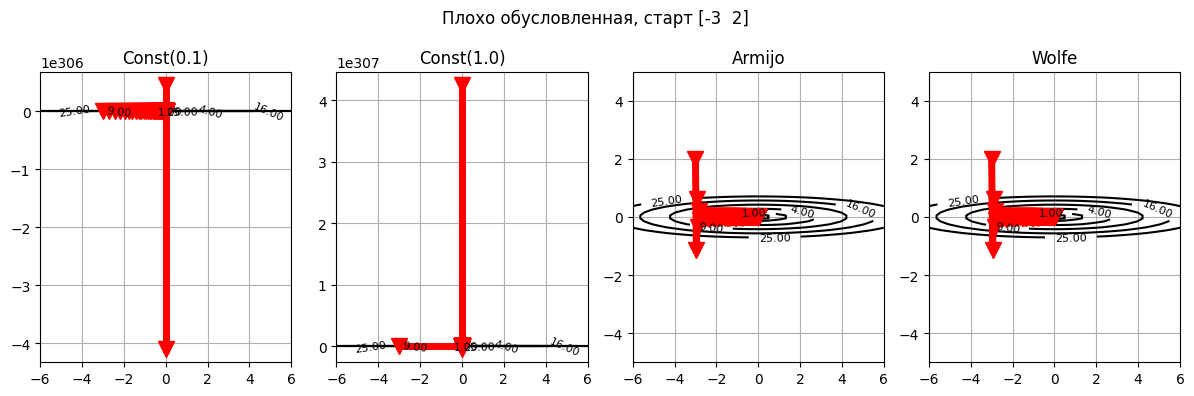

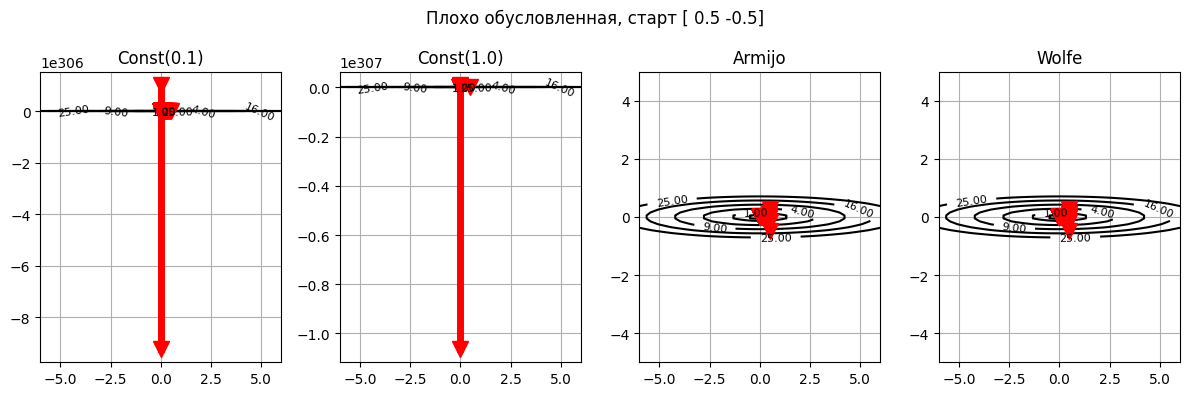


С корреляцией (число обусловленности 7.0)


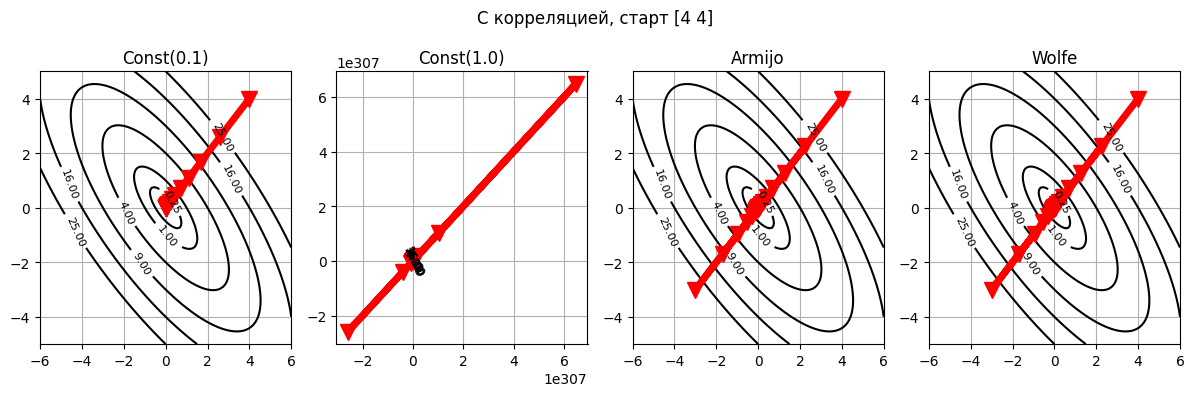

ValueError: arange: cannot compute length

Error in callback <function _draw_all_if_interactive at 0x786bb94b5ee0> (for post_execute):


ValueError: arange: cannot compute length

ValueError: arange: cannot compute length

<Figure size 1200x400 with 4 Axes>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from oracles import QuadraticOracle
from plot_trajectory_2d import plot_levels, plot_trajectory
from optimization import gradient_descent, get_line_search_tool

def test_gradient_descent_cases():
    # Определяем разные тестовые случаи для матриц А
    cases = [
        (np.array([[1,0],[0,1]]), "Хорошо обусловленная"),             # Диагональная единичная матрица
        (np.array([[1,0],[0,100]]), "Плохо обусловленная"),            # Диагональная с очень большим условием числа
        (np.array([[2,1.5],[1.5,2]]), "С корреляцией")                 # Матрица с корреляцией между переменными
    ]

    # Начальные точки для запуска градиентного спуска
    start_points = [
        np.array([4,4]),       # Точка, удаленная от минимума
        np.array([-3,2]),      # Другой пример начальной точки
        np.array([0.5,-0.5])   # Точка, близкая к минимуму
    ]

    # Различные стратегии поиска шага (линейный поиск)
    strategies = [
        {'method':'Constant','c':0.1},    # Постоянный шаг 0.1
        {'method':'Constant','c':1.0},    # Постоянный шаг 1.0
        {'method':'Armijo','c1':1e-4,'alpha_0':1.0},  # Армихо
        {'method':'Wolfe','c1':1e-4,'c2':0.9,'alpha_0':1.0}  # Условия Вульфа
    ]
    strategy_names = ['Const(0.1)','Const(1.0)','Armijo','Wolfe']  # Названия стратегий для графика

    # Перебираем все случаи матриц А
    for A, label in cases:
        # Создаем квадратичную функцию-оракул с данной матрицей
        oracle = QuadraticOracle(A, np.zeros(A.shape[0]))
        # Вычисляем число обусловленности матрицы (макс/мин собственное значение)
        eigvals = np.linalg.eigvals(A)
        cond = max(eigvals)/min(eigvals)
        print(f"\n{label} (число обусловленности {cond:.1f})")

        # Перебираем стартовые точки
        for sp in start_points:
            plt.figure(figsize=(12,4))
            plt.suptitle(f"{label}, старт {sp}")
            # Перебираем стратегии поиска шага
            for i, strat in enumerate(strategies):
                # Запускаем градиентный спуск с выбранной стратегией
                _, _, hist = gradient_descent(
                    oracle, sp,
                    tolerance=1e-6,
                    max_iter=1000,
                    line_search_options=strat,  # Передаем параметры поиска шага
                    trace=True,               # Включаем трассировку (запись истории)
                    display=False
                )
                plt.subplot(1,4,i+1)
                # Построение контуров уровней функции
                plot_levels(oracle.func)
                # Если есть история и 'x' — точки, рисуем траекторию
                if hist and 'x' in hist:
                    plot_trajectory(oracle.func, hist['x'])
                plt.title(strategy_names[i])  # Название стратегии
            plt.tight_layout()
            plt.show()

# Запускаем тестовые случаи
test_gradient_descent_cases()

Этот набор графиков показывает результаты работы градиентного спуска для решения квадратичных задач с разными матрицами А, использующих разные стратегии поиска шага.

Рассматриваются разные методы, разные начальные точки, разные обусловленности.

Контуры уровней функции:
Черные эллипсы показывают линии, на которых значение функции одинаково. Чем ближе к центру — тем меньше значение функции, а центр — точка минимума.
Красные стрелки:
Показывают траекторию поиска градиентного спуска начиная с заданной стартовой точки.
Стрелки "ведут" к точке минимума, показывая направление и путь, пройденный алгоритмом.
Что дает этот эксперимент:
Мы можем увидеть реальные траектории, как градиентный спуск движется к минимуму при разных условиях и стратегиях поиска.